In [1]:
DATA_PATH = 'data'

In [8]:
import pandas as pd
from pathlib import Path

file_path = Path(DATA_PATH) / 'tables_OZ_geo_5700/Карты_мира_озон.xlsm'
source_df = pd.read_excel(file_path)
source_df.rename(columns={col: col.lower() for col in source_df.columns}, inplace=True)
source_df.head(1)

,sku,name,category,схема,brand,niche,seller,balance,balance fbs,warehouses count,...,fbs,base price,category position,categories last count,sales per day average,turnover,frozen stocks,frozen stocks cost,frozen stocks percent,is_primary
0,936454663,Карта мира географическая политическая интерак...,Канцелярские товары/Бумажная продукция/Карты мира,FBO,NaN,Дом и сад/Декор и интерьер/Картины и панно/Гра...,GooDaY,346,0,12,...,0,4990,1,1,5.2,66.54,112,202832,32.37,False


In [9]:
# Image dataset name
DATASET_NAME = "images_OZ_geo_5700"

In [4]:
# Collect images

import nest_asyncio
nest_asyncio.apply()

from utils import parallel_download_img


# Download image files using the 'Thumb' column for both URL and ID extraction
results = await parallel_download_img(
    df=source_df,
    url_col='Thumb',
    img_id_regex=r'/(\d+)\.jpg$',  # capture numeric ID before '.jpg'
    dataset_name=DATASET_NAME,
    base_download_dir=DATA_PATH,
    max_concurrency=100,
    delay=1.0
)

In [11]:
# Merge the list of results into your DataFrame as a new column

source_df['image_name'] = results

Image name: 7006042957.jpg
Name: Карта Ульяновской области общегеографическая, складная


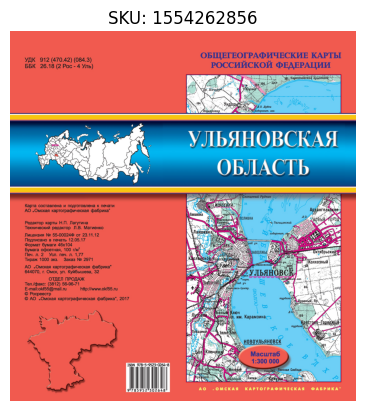

In [17]:
import PIL.Image
import matplotlib.pyplot as plt
from pathlib import Path

# Sample a single row
sample_row = source_df.sample(1).iloc[0]

# Construct the image path
img_path = Path(DATA_PATH) / DATASET_NAME / sample_row['image_name']

# Print the image name
print("Image name:", sample_row['image_name'])
print("Name:", sample_row['name'])

# Load and display the image
img = PIL.Image.open(img_path)
plt.imshow(img)
plt.axis('off')
plt.title(f"SKU: {sample_row['sku']}")
plt.show()


In [12]:
# Save images and names

file_path = (
    Path(DATA_PATH) /
    Path('tables_OZ_geo_5700') /
    Path('OZ_geo_5700_no_descriptions.csv')
)

target_df = (
    source_df[['sku', 'name', 'image_name', 'url', 'seller']]
)

target_df.to_csv(file_path, index=None)